<a href="https://colab.research.google.com/github/xyt556/Geo_Programme/blob/main/04_using_basemaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 概述

创建地理空间可视化通常需要将你的数据叠加在底图上。[Contextily](https://contextily.readthedocs.io/en/latest/) 是一个允许你从互联网上获取各种底图并将它们作为静态图像添加到你的图表中的包。

我们将学习如何使用显示 [2017 年日食](https://svs.gsfc.nasa.gov/4518) 路径的 shapefile 文件，并创建一个带有地形底图的地图。

(1) Adding Basemaps In Python With Contextily | D-Lab. https://dlab.berkeley.edu/news/adding-basemaps-python-contextily.
(2) geopandas/contextily: Context geo-tiles in Python - GitHub. https://github.com/geopandas/contextily.
(3) contextily: context geo tiles in Python — contextily 1.6.2.dev1 .... https://contextily.readthedocs.io/en/latest/index.html.
(4) undefined. https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_06_place_500k.zip.

## 设置和数据下载

以下代码块将安装所需的软件包并将数据集下载到您的Colab环境中。

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt install libspatialindex-dev
  !pip install fiona shapely pyproj rtree
  !pip install geopandas
  !pip install contextily

`contextily` 是一个用于在地理空间可视化中添加底图的 Python 库。它特别适用于在 `matplotlib` 或 `geopandas` 中创建地图时，为数据添加背景地图。这个库提供了多种底图样式，主要基于 OpenStreetMap（OSM）数据和其他公共底图服务。

### 主要功能

1. **添加底图**：`contextily` 可以将各种底图（例如 OpenStreetMap、Stamen、Google Maps 等）添加到你的地理数据可视化中。
2. **支持不同投影**：能够将底图与地理数据对齐，无论你使用的是何种地图投影。
3. **简单易用**：通过简洁的 API 使添加底图变得容易，通常只需几行代码即可完成。

### 安装

可以通过 `pip` 安装 `contextily`：

```bash
pip install contextily
```

### 使用示例

#### 基本用法

以下是如何使用 `contextily` 在 `matplotlib` 中绘制地图并添加底图的示例：

```python
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# 读取地理数据
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 设置地图投影为 Web Mercator（EPSG:3857），这是底图所用的投影
gdf = gdf.to_crs(epsg=3857)

# 创建一个绘图对象
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制 GeoDataFrame
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')

# 添加底图
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# 设置标题
ax.set_title('World Map with Basemap')

plt.show()
```

#### 高级用法

`contextily` 也支持自定义底图样式和配置。例如，使用不同的底图样式或设置不同的图层参数：

```python
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)
```

### 主要底图服务

- **OpenStreetMap**：免费的开放地图数据，适合各种用途。
- **Stamen**：提供多种风格的底图，包括 Toner、Terrain 和 Watercolor。
- **CartoDB**：高质量的底图服务，提供多种样式。

### 与 `geopandas` 集成

`contextily` 与 `geopandas` 集成良好，通常用于在 `geopandas` 中创建的地图上添加底图。`geopandas` 是一个用于处理地理数据的库，提供了处理和可视化空间数据的强大功能。

### 官方文档和资源

- **官方文档**：[contextily Documentation](https://contextily.readthedocs.io/en/latest/)
- **GitHub 仓库**：[contextily GitHub](https://github.com/geo-py/contextily)

`contextily` 使得地理数据可视化变得更为直观和富有表现力，适用于各种地理数据分析和展示场景。

In [ ]:
import contextily as cx
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

path_shapefile = 'upath17'
umbra_shapefile = 'umbra17'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/xyt556/python-dataviz-web/raw/main/data/eclipse/'

for shapefile in [path_shapefile, umbra_shapefile]:
  for ext in shapefile_exts:
    url = data_url + shapefile + ext
    download(url)

Downloaded data/upath17.shp
Downloaded data/upath17.shx
Downloaded data/upath17.dbf
Downloaded data/upath17.prj
Downloaded data/umbra17.shp
Downloaded data/umbra17.shx
Downloaded data/umbra17.dbf
Downloaded data/umbra17.prj


## 数据预处理

In [ ]:
path_shapefile_path = os.path.join(data_folder, path_shapefile + '.shp')
path_gdf = gpd.read_file(path_shapefile_path)
path_gdf

Name  Time0  Time1                                           geometry
0  UmbraPath  17:00  19:50  POLYGON ((-130.08398 45.36563, -130.07227 45.3...

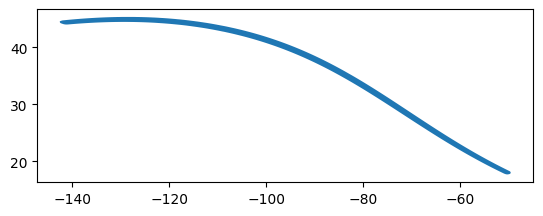

In [ ]:
path_gdf.plot()
plt.show()

In [ ]:
umbra_shapefile_path = os.path.join(data_folder, umbra_shapefile + '.shp')
umbra_gdf = gpd.read_file(umbra_shapefile_path)
umbra_gdf[:5]

Name   Time   TZ                                           geometry
0  Umbra01  10:00  PDT  POLYGON ((-141.73242 44.78022, -141.72070 44.7...
1  Umbra02  10:10  PDT  POLYGON ((-130.59961 45.35650, -130.58789 45.3...
2  Umbra03  10:20  PDT  POLYGON ((-121.85742 45.20222, -121.84570 45.2...
3  Umbra04  11:30  MDT  POLYGON ((-114.77930 44.60543, -114.76758 44.6...
4  Umbra05  11:40  MDT  POLYGON ((-108.63867 43.72656, -108.62695 43.7...

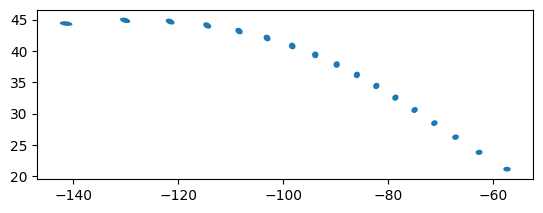

In [ ]:
umbra_gdf.plot()
plt.show()

## 创建多层地图

我们可以使用 `plot()` 方法显示一个 GeoDataFrame。

(1) Mapping and plotting tools — GeoPandas 1.0.1+0.g747d66e.dirty documentation. https://geopandas.org/en/stable/docs/user_guide/mapping.html.
(2) geopandas.GeoDataFrame.plot — GeoPandas 0.14.2+0.gfb079bf.dirty .... https://docs.geopandas.org/en/v0.14.2/docs/reference/api/geopandas.GeoDataFrame.plot.html.
(3) geopandas.GeoDataFrame.plot — GeoPandas 0.8.1 documentation. https://bing.com/search?q=GeoDataFrame+plot%28%29+method.
(4) geopandas.GeoDataFrame.plot — GeoPandas 0.8.1 documentation. https://martinfleischmann.net/geopandas_docs/docs/reference/api/geopandas.GeoDataFrame.plot.html.
(5) Plotting Geospatial Data using GeoPandas - GeeksforGeeks. https://www.geeksforgeeks.org/videos/plotting-geospatial-data-using-geopandas/.
(6) Creating maps in Python with geopandas: a tutorial (2024). https://www.sidmetcalfe.com/guides/creating-maps-in-python-with-geopandas-a-tutorial.html.

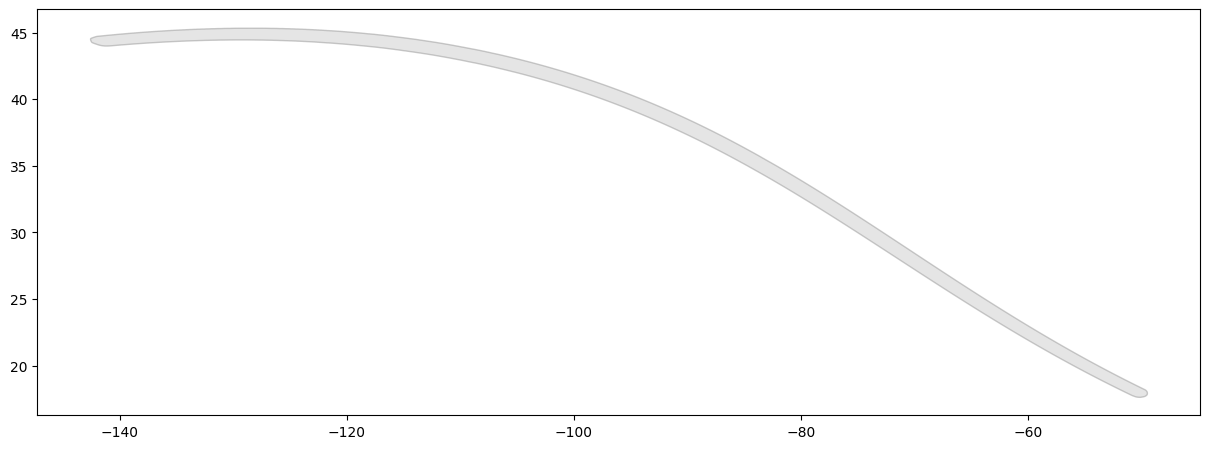

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
plt.show()

要在我们的图上添加另一层，我们可以简单地在同一个坐标轴上渲染另一个 GeoDataFrame。

(1) Mapping and plotting tools — GeoPandas 1.0.1+0.g747d66e.dirty documentation. https://geopandas.org/en/stable/docs/user_guide/mapping.html.
(2) geopandas.GeoDataFrame.plot — GeoPandas 0.14.2+0.gfb079bf.dirty .... https://docs.geopandas.org/en/v0.14.2/docs/reference/api/geopandas.GeoDataFrame.plot.html.
(3) geopandas.GeoDataFrame.plot — GeoPandas 0.8.1 documentation. https://bing.com/search?q=GeoDataFrame+plot%28%29+method.
(4) geopandas.GeoDataFrame.plot — GeoPandas 0.8.1 documentation. https://martinfleischmann.net/geopandas_docs/docs/reference/api/geopandas.GeoDataFrame.plot.html.
(5) Plotting Geospatial Data using GeoPandas - GeeksforGeeks. https://www.geeksforgeeks.org/videos/plotting-geospatial-data-using-geopandas/.
(6) Creating maps in Python with geopandas: a tutorial (2024). https://www.sidmetcalfe.com/guides/creating-maps-in-python-with-geopandas-a-tutorial.html.

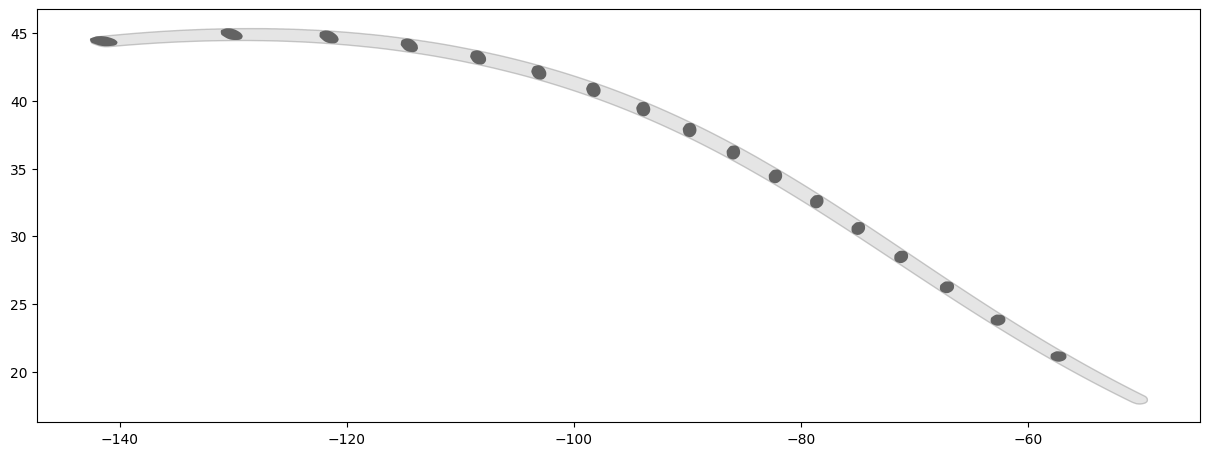

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)
umbra_gdf.plot(ax=ax, facecolor='#636363', edgecolor='none')
plt.show()

## 添加一个底图

该可视化图缺乏上下文，因此不太有用。我们希望将其叠加在底图上，以了解日食的可见范围。我们可以从各种底图样式中进行选择。该库中包含超过200种底图样式。让我们使用 `providers` 属性来查看它们。

(1) Using Basemaps • leaflet - GitHub Pages. https://rstudio.github.io/leaflet/articles/basemaps.html.
(2) Plugins - Leaflet - a JavaScript library for interactive maps. https://leafletjs.com/plugins.html.
(3) Raster tile providers - OpenStreetMap Wiki. https://wiki.openstreetmap.org/wiki/Raster_tile_providers.
(4) Map layer: basemap / overlay tiles — tm_basemap • tmap - GitHub Pages. https://r-tmap.github.io/tmap/reference/tm_basemap.html.
(5) GitHub - alexurquhart/free-tiles: An index of free basemap and overlay .... https://github.com/alexurquhart/free-tiles.
(6) undefined. http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi.
(7) undefined. https://leaflet-extras.github.io/leaflet-providers/preview/.

In [ ]:
# 获取所有可用的底图服务提供商
providers = cx.providers

# 打印可用的底图服务提供商
providers


{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

为了叠加日食路径，让我们使用 *OpenTopoMap* 底图。我们需要为地图指定一个坐标参考系统（CRS）。目前，让我们使用原始 shapefile 的 CRS。

(1) Using Basemaps • leaflet - GitHub Pages. https://rstudio.github.io/leaflet/articles/basemaps.html.
(2) Plugins - Leaflet - a JavaScript library for interactive maps. https://leafletjs.com/plugins.html.
(3) Raster tile providers - OpenStreetMap Wiki. https://wiki.openstreetmap.org/wiki/Raster_tile_providers.
(4) Map layer: basemap / overlay tiles — tm_basemap • tmap - GitHub Pages. https://r-tmap.github.io/tmap/reference/tm_basemap.html.
(5) GitHub - alexurquhart/free-tiles: An index of free basemap and overlay .... https://github.com/alexurquhart/free-tiles.
(6) undefined. http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi.
(7) undefined. https://leaflet-extras.github.io/leaflet-providers/preview/.
(8) Mapping and Data Visualization with Python (Full Course) - Spatial Thoughts. https://courses.spatialthoughts.com/python-dataviz.html.
(9) Adding Basemaps In Python With Contextily | D-Lab. https://dlab.berkeley.edu/news/adding-basemaps-python-contextily.
(10) Google Colab. https://colab.research.google.com/github/spatialthoughts/python-dataviz-web/blob/main/04_using_basemaps.ipynb.
(11) undefined. https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_06_place_500k.zip.

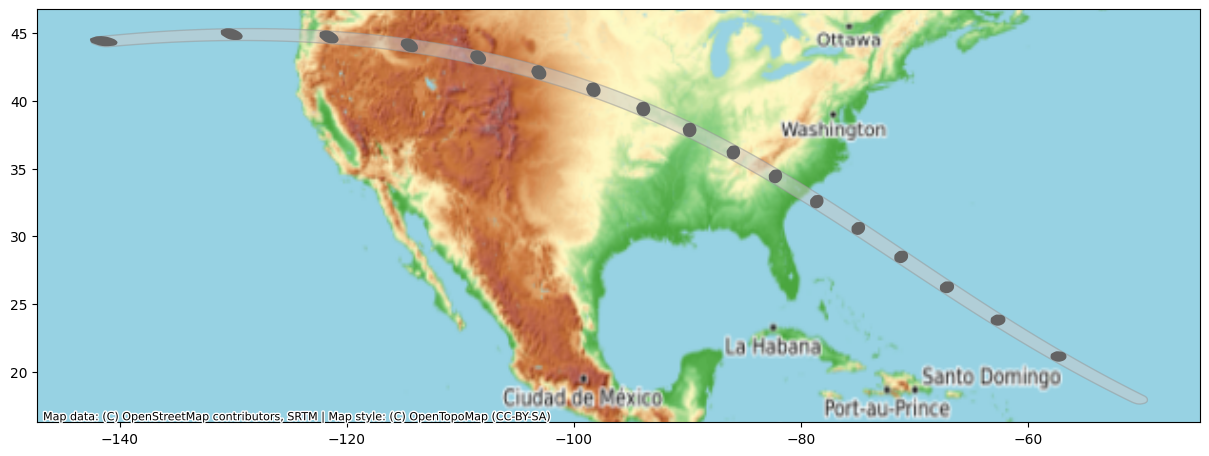

In [ ]:
# 创建一个包含 1 行 1 列子图的图形对象和轴对象
fig, ax = plt.subplots(1, 1)

# 设置图形的大小为 15x7 英寸
fig.set_size_inches(15, 7)

# 绘制 path_gdf 的 GeoDataFrame
# 使用浅灰色 (#cccccc) 作为面颜色，深灰色 (#969696) 作为边框颜色，透明度设置为 0.5
path_gdf.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)

# 绘制 umbra_gdf 的 GeoDataFrame
# 使用深灰色 (#636363) 作为面颜色，不显示边框
umbra_gdf.plot(ax=ax, facecolor='#636363', edgecolor='none')

# 在绘制的图形上添加底图
# 使用 path_gdf 的坐标参考系统 (CRS) 确保底图与数据对齐
# 底图来源设置为 OpenTopoMap
cx.add_basemap(ax, crs=path_gdf.crs, source=cx.providers.OpenTopoMap)

# 显示绘制的图形
plt.show()


底图的网络切片使用的是 Web 墨卡托坐标参考系统（CRS）（EPSG:3857）。当您以不同的 CRS 请求它们时，它们会被扭曲到请求的 CRS。这可能会导致标签在某些情况下不可读。相反，我们可以在其原始 CRS 中请求切片，并将我们的数据层重新投影到其 CRS。

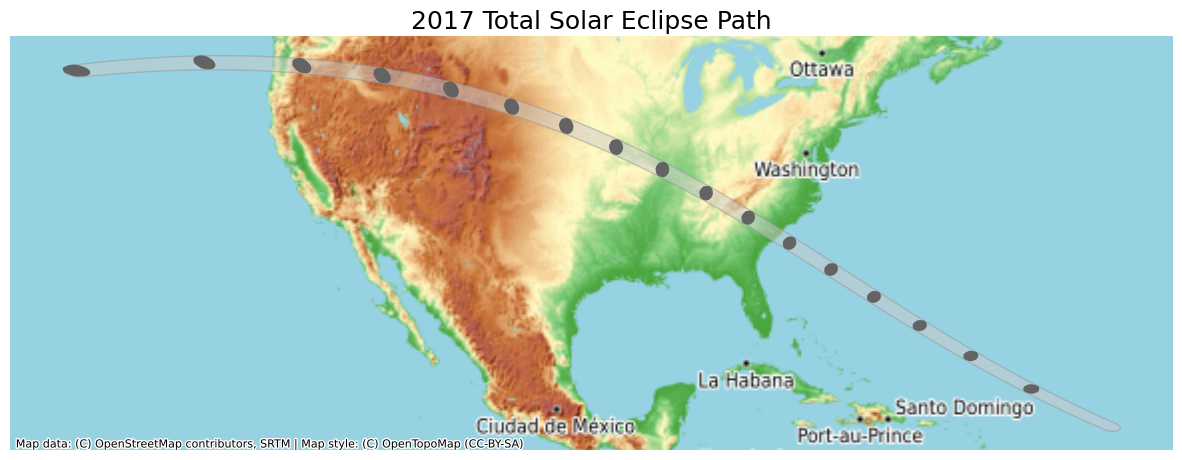

In [ ]:
# 将 path_gdf 和 umbra_gdf 转换到 Web Mercator 投影 (EPSG:3857)，
# 这是底图使用的坐标参考系统 (CRS)
path_reprojected = path_gdf.to_crs('EPSG:3857')
umbra_reprojected = umbra_gdf.to_crs('EPSG:3857')

# 创建一个包含 1 行 1 列子图的图形对象和轴对象
fig, ax = plt.subplots(1, 1)

# 设置图形的大小为 15x7 英寸
fig.set_size_inches(15, 7)

# 绘制 reprojected path_gdf 的 GeoDataFrame
# 使用浅灰色 (#cccccc) 作为面颜色，深灰色 (#969696) 作为边框颜色，透明度设置为 0.5
path_reprojected.plot(ax=ax, facecolor='#cccccc', edgecolor='#969696', alpha=0.5)

# 绘制 reprojected umbra_gdf 的 GeoDataFrame
# 使用深灰色 (#636363) 作为面颜色，不显示边框
umbra_reprojected.plot(ax=ax, facecolor='#636363', edgecolor='none')

# 在绘制的图形上添加底图
# 使用 path_reprojected 的坐标参考系统 (CRS) 确保底图与数据对齐
# 底图来源设置为 OpenTopoMap
cx.add_basemap(ax, crs=path_reprojected.crs, source=cx.providers.OpenTopoMap)

# 隐藏坐标轴
ax.set_axis_off()

# 设置图形的标题，并设置字体大小为 18
ax.set_title('2017 Total Solar Eclipse Path', size=18)

# 显示绘制的图形
plt.show()


## 练习

请使用 *Stamen* 的 *Toner* 底图创建一个可视化图，而不是使用 OpenTopoMap。将生成的可视化图保存为 PNG 文件 `eclipse_path.png`。

(1) maps.stamen.com. https://maps.stamen.com/.
(2) maps.stamen.com / toner. https://maps.stamen.com/toner/.
(3) Open Source Tools - Stamen. https://stamen.com/open-source/.
(4) Stamen Toner ,Stamen Terrain and Mapbox Bright Maps in Python-Folium. https://www.geeksforgeeks.org/stamen-toner-stamen-terrain-and-mapbox-bright-maps-in-python-folium/.